In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
from scipy import optimize
from scipy import *
import scipy
from scipy import stats
import tables
import h5py

#!jt -t onedork -cellw 90%

In [2]:
uscal=50
vscal=5
extraterms=True

In [3]:
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]

In [4]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('phinp.h5','r') as f:
    phi_group_key = list(f.keys())[0]
    phinpi=f[phi_group_key]
    phinp = np.asarray(phinpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
    
    
if extraterms==True:
    with h5py.File('drnpu.h5','r') as f:
        dru_group_key = list(f.keys())[0]
        drnpui=f[dru_group_key]
        drnpu = np.asarray(drnpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('drnpv.h5','r') as f:
        drv_group_key = list(f.keys())[0]
        drnpvi=f[drv_group_key]
        drnpv = np.asarray(drnpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dsignpu.h5','r') as f:
        dsigu_group_key = list(f.keys())[0]
        dsignpui=f[dsigu_group_key]
        dsignpu = np.asarray(dsignpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dsignpv.h5','r') as f:
        dsigv_group_key = list(f.keys())[0]
        dsignpvi=f[dsigv_group_key]
        dsignpv = np.asarray(dsignpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dphinpu.h5','r') as f:
        dphiu_group_key = list(f.keys())[0]
        dphinpui=f[dphiu_group_key]
        dphinpu = np.asarray(dphinpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dphinpv.h5','r') as f:
        dphiv_group_key = list(f.keys())[0]
        dphinpvi=f[dphiv_group_key]
        dphinpv = np.asarray(dphinpvi[::uscal,::vscal],dtype=np.float_)
    
    

print(str(rnp.nbytes)+" bytes")

print(rnp)

switchax=rnputil[9]
print(switchax)
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    #phinp=np.swapaxes(phinp,0,1)
    #massnp=np.swapaxes(massnp,0,1)
    print("Switched Axes")

#print(massnp[1])
print(rnp[:,4])

5769600 bytes
[[2.         2.00231136 2.00463085 ... 4.10077265 4.10090745 4.10104165]
 [1.96552839 1.96771479 1.96990933 ... 4.0986238  4.09876828 4.09891211]
 [1.93367635 1.93574118 1.93781406 ... 4.09637388 4.09652848 4.09668238]
 ...
 [0.08483741 0.33070011 0.38989157 ... 0.67249334 0.6724716  0.67244974]
 [0.08433327 0.33069997 0.38989149 ... 0.67249334 0.6724716  0.67244974]
 [0.08384109 0.33069985 0.38989143 ... 0.67249334 0.6724716  0.67244974]]
0.0
[2.00929423 1.97432279 1.94198404 1.91206607 1.88437569 1.85873666
 1.83498802 1.81298267 1.79258598 1.77367468 1.75613572 1.73986541
 1.72476848 1.71075734 1.69775141 1.68567648 1.67446416 1.66405137
 1.65437988 1.64539592 1.63704979 1.62929555 1.62209067 1.61539582
 1.60917453 1.60339306 1.59802012 1.59302669 1.58838586 1.58407269
 1.58006401 1.57633832 1.57287566 1.56965751 1.56666665 1.56388709
 1.56130399 1.55890353 1.55667291 1.55460019 1.5526743  1.55088493
 1.54922253 1.54767818 1.5462436  1.54491112 1.54367355 1.54252427
 1

In [5]:
print(rnputil)

M=massnp[20,-1]

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0
    
#M=nan.max(massnp)

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.2,1.3,4.0],args=(M,Q,Lambda), method='hybr',tol=.0000001)
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
print('---')
print(M,Q,Lambda)
print('---')
print(0.0,rminus,rplus,rcosm)


['180102000' '30017' '6000' '2.0' '0.04614583333333333' '1.0' '0.95' '0.1'
 'True' '0.0' 'edd']
N=180102000
---
1.0000234606204519 0.95 0.1
---
0.0 0.6767019758217111 1.52885220883053 4.130407919261913


In [6]:
def kappa(fr,r,M,Q,Lambda):
    return 0.5*np.abs(scipy.misc.derivative(fr,r,dx=.00000001,n=1,args=(M,Q,Lambda)))
#def kappa2(dfr,r,M,Q,Lambda):
    #return optimize.root(dfr,[0.01,1.5,50.0],args=(M,Q,Lambda),tol=10**(-10), method='hybr')

kappaplus=kappa(fr,rplus,M,Q,Lambda)
kappaminus=kappa(fr,rminus,M,Q,Lambda)
kappacosm=kappa(fr,rcosm,M,Q,Lambda)
print('k+: '+str(kappaplus),'k-: '+str(kappaminus),'kc: '+str(kappacosm))
###double-check for Lambda=0
###kappaminus
#print(np.abs((M*rminus-Q**2)/rminus**3.0))
#print(0.5*np.abs(dfr(rminus,M,Q,Lambda)))
###

#print(kappaplus-kappacosm)


k+: 0.12432414993324148 k-: 0.7511703187419727 kc: 0.09187079152983557


In [61]:
uval=600#2100
print(0,Nu)

0 601


In [62]:
dercorr=dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
vrange2=vrange*dercorr
print(dercorr)

1.0


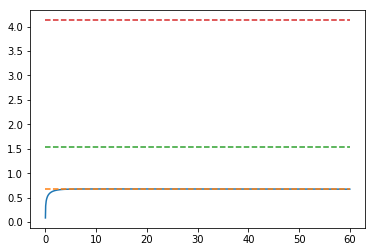

In [63]:
plt.plot(vrange,rnp[uval])
plt.plot([min(vrange),max(vrange)],[rminus,rminus],'--')
plt.plot([min(vrange),max(vrange)],[rplus,rplus],'--')
plt.plot([min(vrange),max(vrange)],[rcosm,rcosm],'--')
#plt.ylim(rcosm-.0000001,rcosm+.0000001)
#plt.ylim(rminus-.001,rminus+.001)
plt.show()

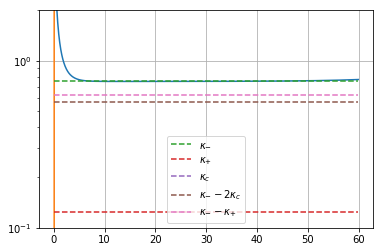

In [64]:
plt.plot(vrange2,np.abs(dsignpv[uval])/dercorr)
plt.plot(vrange2,np.abs(dsignpu[uval])/dercorr)
plt.plot([min(vrange2),max(vrange2)],[kappaminus,kappaminus],'--',label=r'$\kappa_{-}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappacosm,kappaminus-kappacosm],'--',label=r'$\kappa_{-}-\kappa_{c}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label=r'$\kappa_{-}-\kappa_{+}$')
plt.plot([min(vrange2),max(vrange2)],[kappaplus,kappaplus],'--',label=r'$\kappa_{+}$')
plt.plot([min(vrange2),max(vrange2)],[kappacosm,kappacosm],'--',label=r'$\kappa_{c}$')
plt.plot([min(vrange2),max(vrange2)],[kappaminus-2*kappacosm,kappaminus-2*kappacosm],'--',label=r'$\kappa_{-}-2\kappa_{c}$')
plt.plot([min(vrange2),max(vrange2)],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label=r'$\kappa_{-}-\kappa_{+}$')
#plt.plot([min(vrange),max(vrange)],[kappaplus-kappacosm,kappaplus-kappacosm],'--',label=r'$\kappa_{c}$')
plt.yscale('log')
#plt.ylim(1,2)
plt.ylim(.1,2.)
plt.legend(loc='best')
plt.grid()
plt.show()

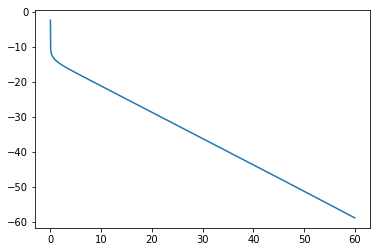

601 1200
0.0 [ -0.75294258 -13.62984721]
-0.7630810899705003


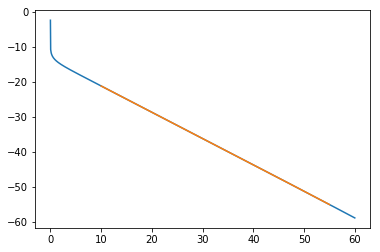

0.7521734121564358
0.0 0.09187079152983557 0.7511703187419727 0.12432414993324148
0.0 0.6592995272121371
0.0 0.6268461688087312


In [65]:
plt.plot(vrange2,signp[uval])
plt.show()
print(Nu,Nv)
vrange2=vrange*dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
v1=Nv-1000
v2=Nv-100
print(0.0,np.polyfit(vrange2[v1:v2],signp[uval][v1:v2],1.0))
print(dsignpv[uval][v2])

plt.plot(vrange2,signp[uval])
plt.plot(vrange2[v1:v2],signp[uval][v1:v2])
plt.show()

print(np.abs(dsignpv[uval][int((v1+v2)/2)]))
print(0.0,kappacosm,kappaminus,kappaplus)
print(0.0,kappaminus-kappacosm)
print(0.0,kappaminus-kappaplus)

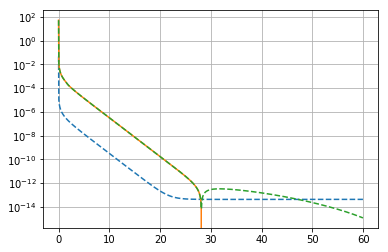

0 -3.304188645588571e-13


In [66]:
plt.plot(vrange2,np.abs(drnpu[uval])/dercorr,'--')
plt.plot(vrange2,drnpv[uval]/dercorr)
plt.plot(vrange2,np.abs(drnpv[uval])/dercorr,'--')
#plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
plt.grid()
plt.show()

print(0,nanmin(drnpv[uval]))

1200
0.0 [ -0.34355284 -13.74360052]


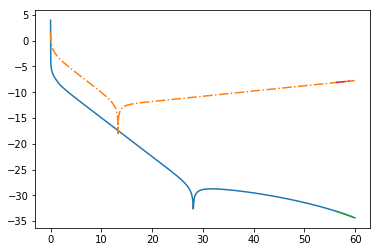

0.0 [  0.10275294 -13.89016741]
0.0 0.09187079152983557 0.12432414993324148 0.7511703187419727
0.6268461688087312
0.6592995272121371


In [67]:
v1=Nv-75
v2=Nv-10
print(Nv)
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(drnpv[uval][v1:v2]/dercorr)),1.0))
plt.plot(vrange2,np.log(np.abs(drnpv[uval]/dercorr)))
plt.plot(vrange2[0:Nv-1],np.log(np.abs(np.diff(rnp[uval])/np.diff(vrange2))),'-.')
plt.plot(vrange2[v1:v2],np.log(np.abs(drnpv[uval][v1:v2]/dercorr)))
plt.plot(vrange2[v1:v2-1],np.log(np.abs(np.diff(rnp[uval][v1:v2])/np.diff(vrange2[v1:v2]))),'-.')
#plt.yscale('log')
plt.show()
print(0.0,np.polyfit(vrange2[v1:v2-1],np.log(np.abs(np.diff(rnp[uval][v1:v2])/np.diff(vrange2[v1:v2]))),1.0))
print(0.0,kappacosm,kappaplus,kappaminus)
print(kappaminus-kappaplus)
print(kappaminus-kappacosm)

0.0 601


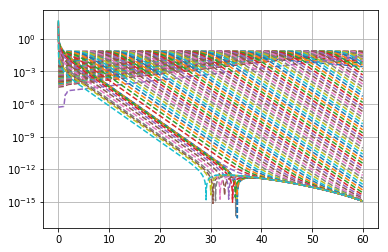

0.0 601


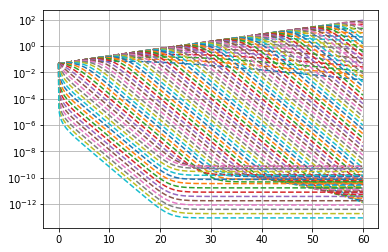

In [68]:
print(0.0,Nu)
numlines=100
for i in range(numlines):
    i=int(i*Nu/numlines)
    
    plt.plot(vrange2,np.abs(drnpv[i])/dercorr,'--')
    #plt.plot(vrange2,drnpv[i]/dercorr)
#plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)),'-.')
plt.yscale('log')
#plt.xlim(0,6)
plt.grid()
#plt.savefig('num-rel-pics/drv_Mf='+str(M)+'_Q='+str(Q)+'_Lambda='+str(Lambda)+'_Nu=200_Nv=100__Tol=.05_edd.png',dpi=300)
plt.show()

print(0.0,Nu)
numlines=100
for i in range(numlines):
    i=int(i*Nu/numlines)
    #plt.plot(vrange2,drnpv[i]/dercorr)
    plt.plot(vrange2,np.abs(drnpu[i])/dercorr,'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
#plt.xlim(0,6)
plt.grid()
#plt.savefig('num-rel-pics/Tol=.05_N=100_Nv=100.png',dpi=300)
#plt.savefig('num-rel-pics/dru_Mf='+str(M)+'_Q='+str(Q)+'_Lambda='+str(Lambda)+'_Nu=200_Nv=100__Tol=.05_edd.png',dpi=300)
plt.show()

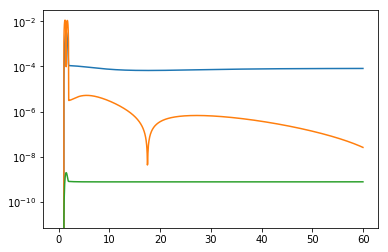

In [69]:
plt.plot(vrange2,np.abs(phinp[uval])/dercorr)
plt.plot(vrange2,np.abs(dphinpv[uval])/dercorr)
plt.plot(vrange2,np.abs(dphinpu[uval])/dercorr)
#plt.plot(vrange,dphinpv[0])
plt.yscale('log')
plt.show()

0.0 [-0.23033621 -3.67373365]


/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


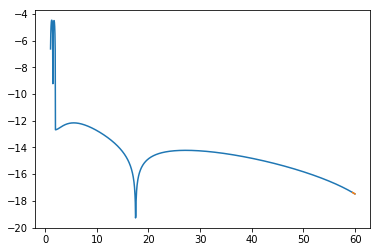

0.0 0.09187079152983557


In [40]:
v1=Nv-10
v2=Nv
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(dphinpv[uval][v1:v2]/dercorr)),1.0))
plt.plot(vrange2,np.log(np.abs(dphinpv[uval])))
plt.plot(vrange2[v1:v2],np.log(np.abs(dphinpv[uval][v1:v2])))
plt.show()
print(0.0,kappacosm)

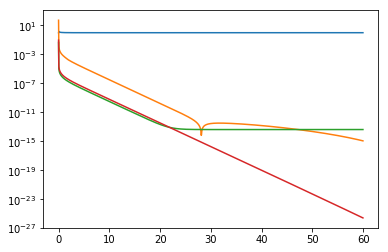

0 1200 0.7511703187419727
0.0 [ 0.00084171 -0.04585924]


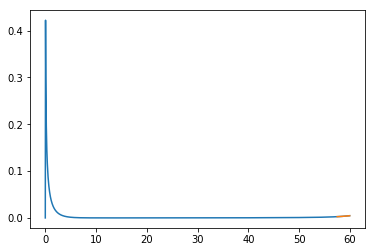

0.7511703187419727
0.5674287356823016


In [41]:
plt.plot(vrange2,np.abs(massnp[uval]))
plt.plot(vrange2,np.abs(drnpv[uval]))
plt.plot(vrange2,np.abs(drnpu[uval]))
plt.plot(vrange2,np.abs(np.exp(signp[uval])))
#plt.ylim(massnp[uval,-1]-.00000000001,massnp[uval,-1]+.00000000001)
plt.yscale('log')
plt.show()
print(0,Nv,kappaminus)
v1=Nv-50
v2=Nv-00
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])),1.0))
plt.plot(vrange2,np.log(np.abs(massnp[uval])))
plt.plot(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])))
plt.show()

print(kappaminus)
print(kappaminus-2*kappacosm)

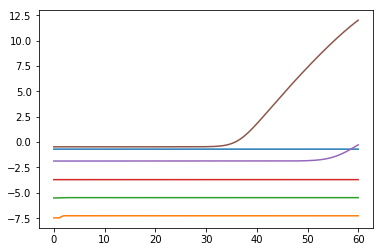

In [42]:
for i in range(int(Nu/100)):
    i2=100*i
    plt.plot(vrange,np.log(np.abs(np.exp(-signp[i2])*drnpv[i2])))#*drnpv[i2])))
plt.show()


1200
[ 0.47799549 -3.92692499]


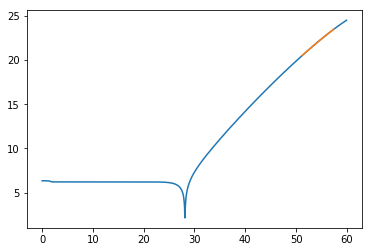

0.7511703187419727 0.5674287356823016 0.5025220188754898


In [43]:
print(Nv)
uval2=uval
v1=Nv-175
v2=Nv-50
print(np.polyfit(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])),1.0))
plt.plot(vrange2,np.log(np.abs(np.exp(-signp[uval2])*drnpv[uval2])))
plt.plot(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])))
plt.show()

print(kappaminus,kappaminus-2*kappacosm,kappaminus-2*kappaplus)

In [44]:
print(massnp[0,-1])

1.0000114302611132


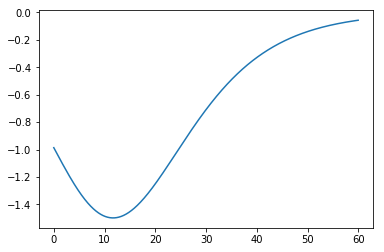

In [45]:
rnp2=rnp[0,-100]+10**(-15)*np.random.random(Nv)

dsignpv3=2*((massnp[0,-100]*rnp2-Q**2-1/3*Lambda*rnp2**4)/(rnp2**3-2*massnp[0,-100]*rnp2**2+Q**2*rnp2-Lambda/3*rnp2**5))*drnpv[0]
plt.plot(vrange,dsignpv3)
#plt.ylim(-1,1)
plt.show()
#print(dsignpv2)

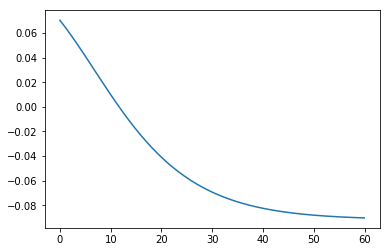

[ 0.07044356  0.07018048  0.06991666 ... -0.09032783 -0.09033454
 -0.09034121]


In [46]:
dsignpv2=2*((massnp[0,0]*rnp[0]-Q**2-1/3*Lambda*rnp[0]**4)/(rnp[0]**3-2*massnp[0,0]*rnp[0]**2+Q**2*rnp[0]-Lambda/3*rnp[0]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
plt.show()
print(dsignpv2)

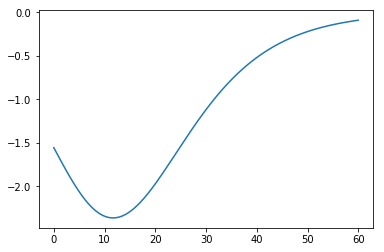

[-1.55465647 -1.56014404 -1.56563033 ... -0.09125494 -0.09084383
 -0.09043454]


In [47]:
massnp2=massnp[0,-1]+10**(-19)*np.random.random(Nv)

dsignpv2=2*((massnp2*rnp[0,-1]-Q**2-1/3*Lambda*rnp[0,-1]**4)/(rnp[0,-1]**3-2*massnp2*rnp[0,-1]**2+Q**2*rnp[0,-1]-Lambda/3*rnp[0,-1]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
#plt.ylim(-.12,-.09)
plt.show()
print(dsignpv2)

In [48]:
Rfunc=-drnpv[uval]*drnpu[uval]/rnp[uval]-np.exp(signp[uval])/(4.0*rnp[uval])*(1.0-np.power((Q/rnp[uval]),2.0)-Lambda*np.power(rnp[uval],2.0))

0.0 601


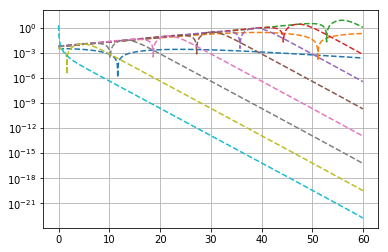

In [25]:
print(0.0,Nu)
numlines=10
for i in range(numlines):
    i=int(i*Nu/numlines)
    Rfunc=-drnpv[i]*drnpu[i]/rnp[i]-np.exp(signp[i])/(4.0*rnp[i])*(1.0-np.power((Q/rnp[i]),2.0)-Lambda*np.power(rnp[i],2.0))
    #plt.plot(vrange2,Rfunc/dercorr)
    plt.plot(vrange2,np.abs(Rfunc)/dercorr,'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
plt.grid()
plt.show()
#plt.plot(vrange2,Rfunc)
#plt.plot(vrange2,np.abs(Rfunc),'--')
#plt.yscale('log')
#plt.show()

In [26]:
r2=1.56
print(1-Q**2.0/r2**2.0-Lambda*r2**2.0)

0.3857902301117686


In [27]:
print(urange)

[1.39770719e-02 7.59926227e-01 1.44919556e+00 2.08641680e+00
 2.67580357e+00 3.22119275e+00 3.72608167e+00 4.19366144e+00
 4.62684684e+00 5.02830306e+00 5.40046963e+00 5.74558186e+00
 6.06569000e+00 6.36267643e+00 6.63827101e+00 6.89406491e+00
 7.13152298e+00 7.35199489e+00 7.55672511e+00 7.74686201e+00
 7.92346595e+00 8.08751666e+00 8.23991988e+00 8.38151344e+00
 8.51307274e+00 8.63531570e+00 8.74890733e+00 8.85446388e+00
 8.95255659e+00 9.04371518e+00 9.12843101e+00 9.20715997e+00
 9.28032515e+00 9.34831932e+00 9.41150711e+00 9.47022718e+00
 9.52479405e+00 9.57549990e+00 9.62261618e+00 9.66639515e+00
 9.70707120e+00 9.74486220e+00 9.77997067e+00 9.81258483e+00
 9.84287970e+00 9.87101799e+00 9.89715097e+00 9.92141933e+00
 9.94395386e+00 9.96487622e+00 9.98429954e+00 1.00023290e+01
 1.00190626e+01 1.00345912e+01 1.00489996e+01 1.00623664e+01
 1.00747651e+01 1.00862636e+01 1.00969256e+01 1.01068099e+01
 1.01159715e+01 1.01244616e+01 1.01323276e+01 1.01396138e+01
 1.01463615e+01 1.015260

In [28]:
print(np.nanmin(massnp[:,0]),np.nanmax(massnp[:,0]))

0.999999999999999 1.0000000000000013
